<a href="https://colab.research.google.com/github/bnv20/Caba_dl/blob/main/nlp11_word_embeddings_guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 단어와 벡터를 연관짓는 강력하고 인기 있는 또 다른 방법은 단어 임베딩이라는 밀집 단어 벡터를 사용하는 것이다. 
- 원-핫 인코딩으로 만든 벡터는 희소하고(대부분 0으로 채워집니다) 고차원이다(어휘 사전에 있는 단어의 수와 차원이 같다). 
- 반면 단어 임베딩은 저차원의 실수형 벡터이다(희소 벡터의 반대인 밀집 벡터이다). 그림 6-2를 참고
- 원-핫 인코딩으로 얻은 단어 벡터와 달리 단어 임베딩은 데이터로부터 학습된다. - 보통 256차원, 512차원 또는 큰 어휘 사전을 다룰 때는 1,024차원의 단어 임베딩을 사용한다.
- 반면 원-핫 인코딩은 (20,000개의 토큰으로 이루어진 어휘 사전을 만들려면) 20,000차원 또는 그 이상의 벡터일 경우가 많다. 
- 따라서 단어 임베딩이 더 많은 정보를 적은 차원에 저장한다.

![word embeddings vs. one hot encoding](https://s3.amazonaws.com/book.keras.io/img/ch6/word_embeddings.png)

In [2]:
%cd drive/MyDrive/Caba2012_colab/

/content/drive/MyDrive/Caba2012_colab


In [4]:
%cd /content

/content


In [1]:
import os

imdb_dir = 'drive/MyDrive/Caba2012_colab/datasets/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg','pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name,fname), encoding='utf8')
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1) 



In [3]:
texts[0]

"In the U.S., very few films have been made about Rome that were not set in the time of Julius Caesar or shortly thereafter. Hollywood's sword and sandal epics mostly have a Christian theme, which makes it difficult to get into earlier Roman history (Spartacus was probably the first exception to this rule, and encountered some resistance in Hollywood because it did not have Jesus in it).<br /><br />It's interesting to see at least one picture that not only takes place before the time of Caesar and Christ, but is set when Rome was only one city among many on the Italian peninsula, and had just ousted the hated King Tarquin and formed the Republic.<br /><br />However, this is not a historical film; it's peplum, and while the production values aren't rock bottom, the acting and characterizations are cardboard. I can only imagine what the dialogue was like in Italian, but with wooden English dubbing it's very campy. I got a few good laughs out of it at first.<br /><br />I haven't seen many

### 데이터 토큰화

- 이전 절에서 소개한 개념을 사용해 텍스트를 벡터로 만들고 훈련 세트와 검증 세트로 나누겠습니다. 
- 사전 훈련된 단어 임베딩은 훈련 데이터가 부족한 문제에 특히 유용합니다(그렇지 않으면 문제에 특화된 임베딩이 훨씬 성능이 좋습니다)- 그래서 다음과 같이 훈련 데이터를 처음 200개의 샘플로 제한합니다. 
- 이 모델은 200개의 샘플을 학습한 후에 영화 리뷰를 분류할 것입니다.

In [4]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('데이터 텐서의 크기:', data.shape)
print('레이블 텐서의 크기:', labels.shape)

# 데이터를 훈련 세트와 검증 세트로 분할합니다.
# 샘플이 순서대로 있기 때문에 (부정 샘플이 모두 나온 후에 긍정 샘플이 옵니다) 
# 먼저 데이터를 섞습니다.
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

88582개의 고유한 토큰을 찾았습니다.
데이터 텐서의 크기: (25002, 100)
레이블 텐서의 크기: (25002,)


In [5]:
x_train[0]

array([ 225,   30,  208,   37,    3,  813,   15, 4232,    4,   10,   40,
        293,   11,   19,    5,   64,   86,   73,  430,    9,   67,   76,
         46,    4,    1,  496, 1968,  153,   23,  959, 1687,  803,   18,
         29,   58, 3361,    2,    2,  229,   12,   67, 3256,   20,   58,
        643,    6, 1450,    5,    1, 1567, 4370,    6,    3,   84,  281,
         18,   34,  691,  276,   27,    6,    8, 4123,    5,  190,    3,
        170,    8,  138,    3, 8424,   19,   11,   17,  141,   25,   74,
       1347,    5,   29,    1, 1524,    8,   29,    1,   19, 5797,   40,
          5, 3337,   95,    3, 2036,    4,   86,   21,    5,   94,    3,
         19], dtype=int32)

In [6]:
# 임베딩 전처리

glove_dir = 'drive/MyDrive/colab_lecture/datasets/'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('%s개의 단어 벡터를 찾았습니다.' % len(embeddings_index))

400000개의 단어 벡터를 찾았습니다.


In [21]:
embeddings_index['the']

array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.49744 , 

In [22]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # 임베딩 인덱스에 없는 단어는 모두 0이 됩니다.
            embedding_matrix[i] = embedding_vector

In [23]:
print(embedding_matrix.shape)

(10000, 100)


array([-0.046539  ,  0.61966002,  0.56647003, -0.46584001, -1.18900001,
        0.44599   ,  0.066035  ,  0.31909999,  0.14679   , -0.22119001,
        0.79238999,  0.29905   ,  0.16073   ,  0.025324  ,  0.18678001,
       -0.31000999, -0.28108001,  0.60514998, -1.0654    ,  0.52476001,
        0.064152  ,  1.03579998, -0.40779001, -0.38011   ,  0.30801001,
        0.59964001, -0.26991001, -0.76034999,  0.94221997, -0.46919   ,
       -0.18278   ,  0.90652001,  0.79671001,  0.24824999,  0.25713   ,
        0.6232    , -0.44768   ,  0.65357   ,  0.76902002, -0.51229   ,
       -0.44332999, -0.21867   ,  0.38370001, -1.14830005, -0.94397998,
       -0.15062   ,  0.30012   , -0.57805997,  0.20175   , -1.65910006,
       -0.079195  ,  0.026423  ,  0.22051001,  0.99713999, -0.57538998,
       -2.72659993,  0.31448001,  0.70521998,  1.43809998,  0.99125999,
        0.13976   ,  1.34739995, -1.1753    ,  0.0039503 ,  1.02980006,
        0.064637  ,  0.90886998,  0.82871997, -0.47003001, -0.10

In [24]:
# 모델 정의하기
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                320032    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [25]:
# 모델에 GloVe 임베딩 로드하기
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False  # 임베딩 층 동결

In [26]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('drive/MyDrive/colab_lecture/pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 3s 155ms/step - loss: 2.3475 - acc: 0.5358 - val_loss: 0.7219 - val_acc: 0.5099
Epoch 2/10
7/7 [==============================] - 1s 124ms/step - loss: 0.5611 - acc: 0.7139 - val_loss: 1.0450 - val_acc: 0.4994
Epoch 3/10
7/7 [==============================] - 1s 126ms/step - loss: 0.5177 - acc: 0.7549 - val_loss: 0.6892 - val_acc: 0.5611
Epoch 4/10
7/7 [==============================] - 1s 123ms/step - loss: 0.3434 - acc: 0.8729 - val_loss: 0.8624 - val_acc: 0.5135
Epoch 5/10
7/7 [==============================] - 1s 125ms/step - loss: 0.3824 - acc: 0.8142 - val_loss: 0.7206 - val_acc: 0.5507
Epoch 6/10
7/7 [==============================] - 1s 124ms/step - loss: 0.1936 - acc: 0.9645 - val_loss: 1.1723 - val_acc: 0.5078
Epoch 7/10
7/7 [==============================] - 1s 124ms/step - loss: 0.1246 - acc: 0.9784 - val_loss: 1.0463 - val_acc: 0.5199
Epoch 8/10
7/7 [==============================] - 1s 122ms/step - loss: 0.0978 - acc: 0.98

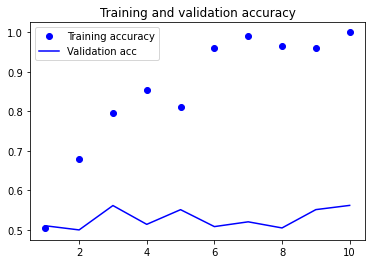

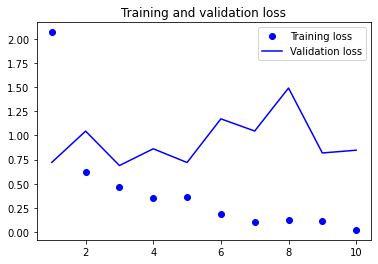

In [28]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [29]:
# 훈련 샘플의 수를 2000개로 늘려서 확인해 보겠습니다.

training_samples = 2000
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [30]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
63/63 [==============================] - 1s 16ms/step - loss: 0.6887 - acc: 0.6210 - val_loss: 0.6437 - val_acc: 0.6229
Epoch 2/10
63/63 [==============================] - 1s 15ms/step - loss: 0.5352 - acc: 0.7340 - val_loss: 1.0319 - val_acc: 0.5166
Epoch 3/10
63/63 [==============================] - 1s 16ms/step - loss: 0.4416 - acc: 0.7975 - val_loss: 0.9968 - val_acc: 0.5610
Epoch 4/10
63/63 [==============================] - 1s 15ms/step - loss: 0.3542 - acc: 0.8505 - val_loss: 0.6652 - val_acc: 0.6452
Epoch 5/10
63/63 [==============================] - 1s 15ms/step - loss: 0.2742 - acc: 0.8985 - val_loss: 0.7628 - val_acc: 0.6182
Epoch 6/10
63/63 [==============================] - 1s 15ms/step - loss: 0.1958 - acc: 0.9335 - val_loss: 0.9540 - val_acc: 0.5972
Epoch 7/10
63/63 [==============================] - 1s 15ms/step - loss: 0.1535 - acc: 0.9500 - val_loss: 0.8057 - val_acc: 0.6345
Epoch 8/10
63/63 [==============================] - 1s 15ms/step - loss: 0.1059 - a

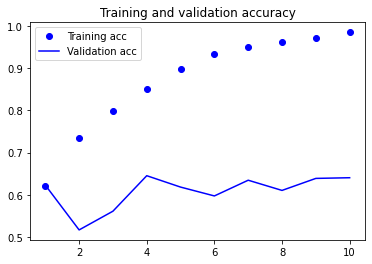

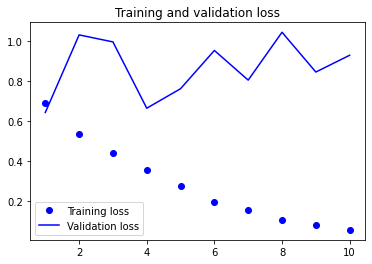

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [32]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [33]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.9256 - acc: 0.6405


[0.925615131855011, 0.6405199766159058]